# Modulated periodical time series

In [47]:
import numpy as np
from scipy.signal import hilbert
import xarray as xr
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

import sstats.tseries as ts

In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster()
#
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster()
#w = cluster.scale(28*1)
#
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:50726 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


---

## generate synthetic data

In [55]:
x = ts.normal((100, 1./24), 0., draws=100).rename('x')
y = ts.normal((100, 1./24), 0., draws=100).rename('x')

omega = 2*np.pi*2

z = np.real((1.+x)*np.cos(omega*x.time)+1j*y*np.sin(omega*x.time)).persist()

zh = xr.apply_ufunc(hilbert, z, dask='parallelized', output_dtypes=[complex])

R = np.abs(zh)
theta = np.angle(zh)

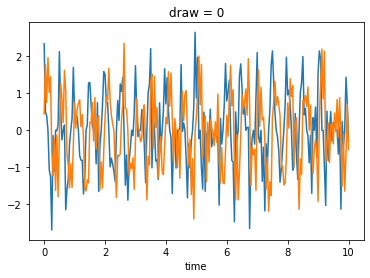

In [56]:
np.real(zh.sel(draw=0, time=slice(0,10))).plot()
np.imag(zh.sel(draw=0, time=slice(0,10))).plot()

(array([8.9240e+03, 2.0600e+04, 3.1461e+04, 3.8723e+04, 3.9877e+04,
        3.4229e+04, 2.5964e+04, 1.7301e+04, 1.0538e+04, 6.0110e+03,
        3.1930e+03, 1.7050e+03, 8.3600e+02, 3.4800e+02, 1.7800e+02,
        6.3000e+01, 3.1000e+01, 1.2000e+01, 4.0000e+00, 2.0000e+00]),
 array([3.33366842e-05, 2.66495492e-01, 5.32957648e-01, 7.99419803e-01,
        1.06588196e+00, 1.33234411e+00, 1.59880627e+00, 1.86526842e+00,
        2.13173058e+00, 2.39819274e+00, 2.66465489e+00, 2.93111705e+00,
        3.19757920e+00, 3.46404136e+00, 3.73050351e+00, 3.99696567e+00,
        4.26342782e+00, 4.52988998e+00, 4.79635214e+00, 5.06281429e+00,
        5.32927645e+00]),
 <a list of 20 Patch objects>)

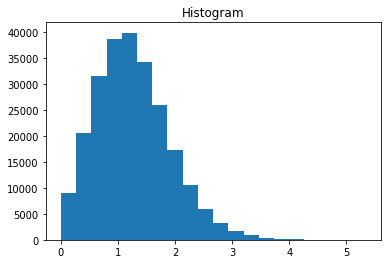

In [57]:
R.plot.hist(bins=20)